# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [3]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_fwd = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Add some calculations to the following code block:

In [10]:
n = -2
beta = 0.5

T = 1073.15    # Temperature, K

C_H_Ni = C_Ni_s*X_H_Ni
C_H2O_Ni = C_Ni_s*X_H2O_Ni
C_Vac_Ni = C_Ni_s*X_Vac_Ni
C_Ox_elyte = C_elyte*X_Ox_elyte
C_Vac_elyte = C_elyte*X_Vac_elyte

dG = g_H2O_Ni_o + g_Vac_elyte_o - 2*g_H_Ni_o - g_Ox_elyte_o
k_rev = k_fwd*exp(dG/R/T)

# Loop over these delta phi = phi_anode - phi_elyte values:
delta_phi = np.linspace(-0.9,0.05,30)
i_elementary = np.zeros_like(delta_phi)


concs_fwd = C_Ox_elyte*C_H_Ni**2
concs_rev = C_H2O_Ni*C_Vac_Ni*C_Vac_elyte

for ind, E in enumerate(delta_phi):
    concs_fwd = C_Ox_elyte*C_H_Ni**2
    concs_rev = C_H2O_Ni*C_Vac_Ni*C_Vac_elyte
    i_elementary[ind] = n*F*(k_fwd*exp(-beta*n*F*E/R/T)*concs_fwd - k_rev*exp((1-beta)*n*F*E/R/T)*concs_rev)


Plot the results:

Text(0, 0.5, 'Current [A/m2]')

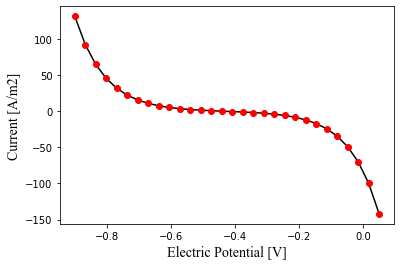

In [11]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m-tpb]')

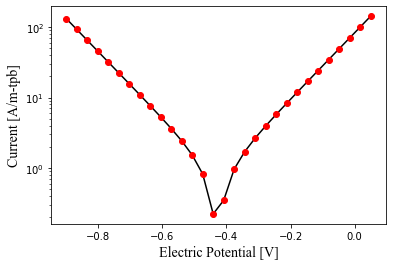

In [12]:
fig1, ax1 = plt.subplots()
ax1.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax1.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m-tpb]',family='Times New Roman',fontsize=14)

### Discussion:

Add some text to _THIS MARKDOWN BLOCK_ to discuss the plots above.  

Do they make sense, and match with your understanding of the theory?  In what ways? Do they match the validatiopn data?  If not, what might be missing from your code?

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [13]:
prod_reac = C_Ox_elyte**(1.-alpha)*C_H_Ni**(2*(1.-alpha))
prod_prod = C_Vac_elyte**alpha*C_H2O_Ni**alpha*C_Vac_Ni**alpha

i_o = n*F*k_fwd**(1.-beta)*k_rev**beta*prod_reac*prod_prod

i_BV = np.zeros_like(delta_phi)

delta_G = dG + R*T*log(X_Vac_elyte*X_Vac_Ni*X_H2O_Ni/X_Ox_elyte/X_H_Ni**2)
E_eq = -delta_G/n/F

for ind, E in enumerate(delta_phi):
    eta = E - E_eq
    i_BV[ind] = i_o*(exp(-n*F*alpha*eta/R/T)-exp(n*F*(1.-alpha)*eta/R/T))

#### Let's plot the BV and mass action currents together:

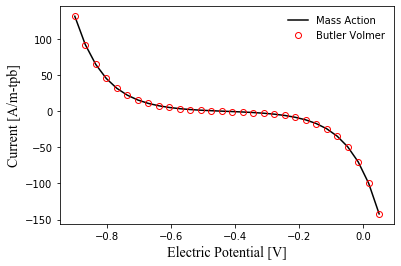

In [14]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m-tpb]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

#### Discussion:

Discuss your plots.  Make new plots, as desired, to aid in your discussion and highlight noteworthy results.

How do you feel about the assumption of constant $i_\circ$?  Are there situations where this is _not_ a good assumption?

Add your thoughts to _THIS MARKDOWN BLOCK_

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [79]:
i_Tafel = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    
    eta = E - E_eq
    i_Tafel[ind] = i_o*(exp(-n*F*beta*eta/R/T))

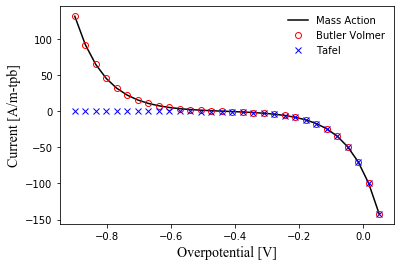

In [80]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m-tpb]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Disucssion: 
What do you notice, from these results?  What from the theory can explain what you sese.

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.

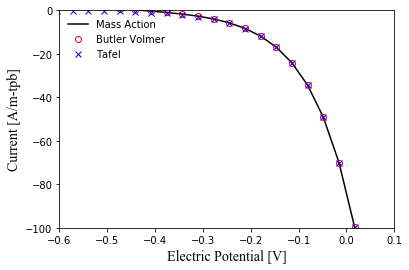

In [82]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m-tpb]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.6,0.1))
plt.ylim((-100,0))
plt.show()

#### Discussion:
The loss in fidelity is not too large. As we would expect, the fit devates notably from the exact expression near zero overpotential.  We are assuming that $\exp\left(\frac{(1-\beta) n_{\rm elec}F\eta}{RT}\right)$ goes to zero, which is only true as $\eta$ gets large.

From the plot, we can see that overpotentials as low at 150 mV qualify as 'sufficiently large.'  The difference between $i_{\rm Tafel}$ and $i_{\rm Bulter volmer}$ and $i_{\rm Marcus}$ are negligibly small for $\eta \geq 0.15$ V.

*However*, the 'notable exception' - that the match is quite poor very close to zero, is actually *quite* problematic, in that we do not get zero current at zero overpotential.  Instead from eq. 7 in the assignment, we see that $i = i_\circ$ at $\eta = 0$.  

The Tafel equation assumes that the reverse current is zero.  At equlibrium (i.e., $\eta = 0$ and therefore $\Delta \Phi = \Delta \Phi_{\rm eq}$), the forward and reverse currents both equal $i_\circ$, and hence $i = i_{\rm fwd} - i_{\rm rev} = i_\circ - i_\circ = 0$.  When we assume that $i_{\rm rev} = 0$, as in the Tafel equation, then $i = i_{\rm fwd}$, which at $\eta = 0$ implies $i = i_\circ$.

This would be a significant problem in any simulation where currents were near zero, since $i_{\rm Tafel}$ is never equal to zero; it only approaches zero as $\eta \rightarrow -\infty$.

However, if you know you will be sufficiently far from $\eta = 0$ that the Tafel equation is accurate, it is very convenient, computationally, and reasonably accurate (but relies on the same assumptions and therefore suffers from the same limitations as Butler Volmer, above).